<a href="https://colab.research.google.com/github/ADEWAdamilola/SQL_Business_Analysis_AdventureWorks/blob/main/Adewa_Oluwadamilola_Eunice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Dataset Analysis with Python**

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Import Data**

In [2]:
data = pd.read_csv('/content/movies dataset.csv')
data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


**Missing value Test**

In [3]:
data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In our dataset, we've identified missing values in several attributes, including movie rating, movie score, year released, movie votes, writer's name, movie budget (which has the highest number of missing values), gross, company, and movie runtime.

To address these gaps and ensure data integrity:

For the numeric columns (movie rating, movie score, year released, movie votes, movie budget, gross, and movie runtime), I'll replace the missing values with the median value of each respective column. The median is a robust measure that helps mitigate the impact of outliers.
For the non-numeric columns (writer's name and company), I'll replace the missing values with the mode, which is the most frequently occurring value in each column. This approach helps maintain consistency within the dataset.
By implementing these strategies, we can enhance the quality and completeness of our data, enabling more accurate analysis and insights.

In [4]:
num_df = data.select_dtypes(exclude='object')
non_num_df = data.select_dtypes(include='object')
non_num_df.head()

,name,rating,genre,released,director,writer,star,country,company
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures


In [5]:
from sklearn.impute import SimpleImputer

# Extracting the numeric and non-numeric columns from the dataset
num_df = data.select_dtypes(include=['number']).columns
non_num_df = data.select_dtypes(exclude=['number']).columns

# Replacing missing values
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[num_df] = numeric_imputer.fit_transform(data[num_df])
data[non_num_df] = non_numeric_imputer.fit_transform(data[non_num_df])

# Checking for missing values again
data.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

**Data Type**

In [6]:
data.dtypes

name         object
rating       object
genre        object
year        float64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


From our analysis, we noticed that the year column and the year in the released column do not match. To correct this, we will extract the correct year from the released column and update the year column accordingly. Similarly, we will align the country information by extracting it from the released column and updating the country column.

In [8]:
import re
# Extracting the year
data['year'] = data['released'].apply(lambda x: re.search(r'\b\d{4}\b', x).group())

# Extract country
data['country'] = data['released'].apply(lambda x: re.search(r'\(([^)]+)\)', x).group(1))

In [9]:
data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [10]:
data.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       61
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

**Remove Duplicate**

In [11]:
data['company'].drop_duplicates(inplace=True)
data.shape

(7668, 15)

**Varaible Correlation**

In [12]:
data['year'] = data['year'].astype('int64')
num_df = data.select_dtypes(exclude='object')
num_df.head(3)

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0


In [13]:
# Computing the pearson product moment correlation coefficient
correlation = num_df.corr()
correlation

,year,score,votes,budget,gross,runtime
year,1.000000,0.106221,0.217995,0.284125,0.252759,0.120573
score,0.106221,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.217995,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.284125,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.252759,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120573,0.399407,0.309151,0.273371,0.244380,1.000000


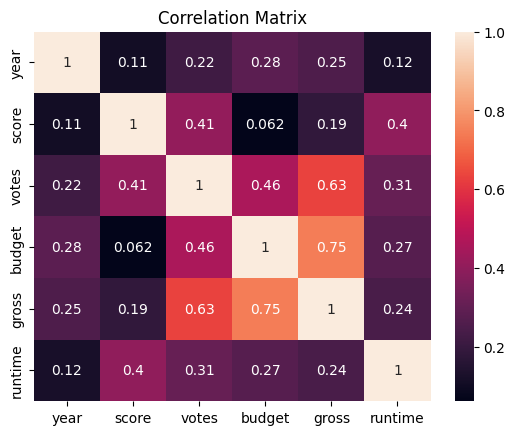

In [14]:
# Visualize the correlation coefficients
# Using the seaborn library to plot the correlation coefficient
sns.heatmap(correlation,annot=True)
plt.title('Correlation Matrix')
plt.show()

From the correlation analysis, we identified a strong positive correlation between gross revenue and budget, as well as between gross revenue and votes. These correlations suggest that higher budgets and higher numbers of votes are associated with higher gross revenues. However, the analysis does not reveal significant relationships among the other variables, indicating they may not have a strong impact on gross revenue.

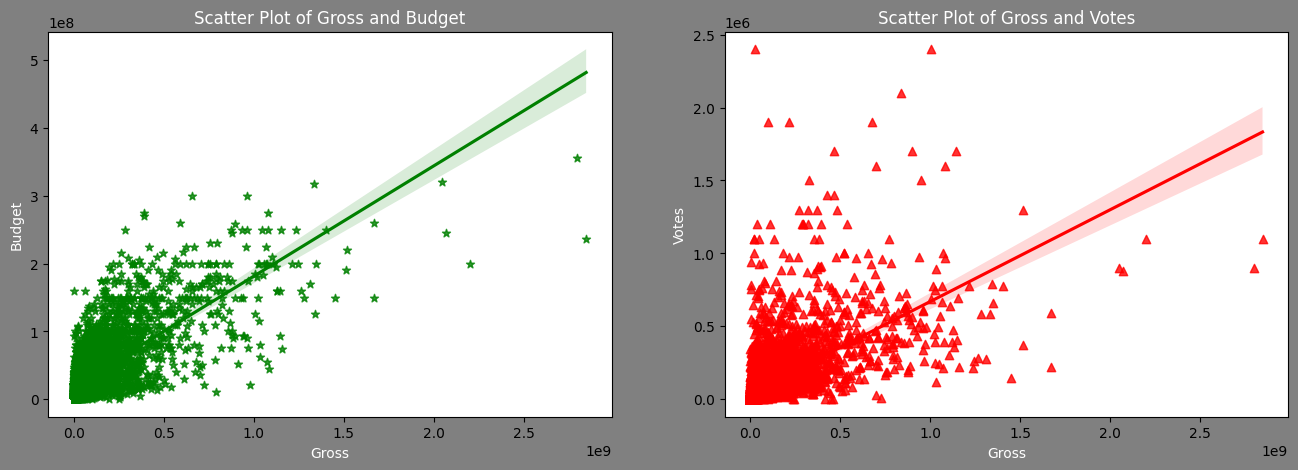

In [16]:
# Scatter plot of gross and budget to further show the nature and type of relationship
fig,axes = plt.subplots(1,2,figsize=(16,5),facecolor='Grey')
sns.regplot(x='gross',y='budget',ax=axes[0],data=num_df,marker='*',color='Green')
axes[0].set_title('Scatter Plot of Gross and Budget',color='white')
axes[0].set_xlabel('Gross',color='white')
axes[0].set_ylabel('Budget',color='white')
sns.regplot(x='gross',y='votes',ax=axes[1],data=num_df,marker='^',color='Red')
axes[1].set_title('Scatter Plot of Gross and Votes',color='white')
axes[1].set_xlabel('Gross',color='white')
axes[1].set_ylabel('Votes',color='white')
plt.show()

The two scatter plots above illustrate a positive linear trend between the variables involved. Specifically, there is a positive linear relationship between gross and budget, as well as between gross and votes. This indicates that as the budget and the number of votes increase, the gross revenue tends to increase as well.

In [17]:
data.groupby('genre')[['gross','budget','votes','runtime','score']].sum()

,gross,budget,votes,runtime,score
genre,,,,,
Action,2.440824e+11,8.858572e+10,239574188.0,187904.0,10576.1
Adventure,4.605804e+10,1.704706e+10,43358242.0,46107.0,2686.5
Animation,8.020266e+10,2.235357e+10,43153458.0,31165.0,2288.0
Biography,2.093164e+10,1.059738e+10,40057318.0,53107.0,3114.7
Comedy,9.824637e+10,4.920528e+10,121865748.0,227849.0,13905.5
Crime,2.153730e+10,1.205024e+10,50102551.0,61568.0,3676.0
Drama,5.816094e+10,3.324386e+10,105888171.0,171478.0,10160.6
Family,2.157897e+09,3.480000e+08,753550.0,1099.0,70.0
Fantasy,1.684707e+09,7.502000e+08,2587900.0,4372.0,264.3


The above analysis indicates that action movies have the highest gross revenue, budget, and number of votes. On the other hand, comedy movies have the highest runtime and score. This suggests that while action movies tend to attract more financial investment and audience engagement, comedy movies are notable for their longer durations and higher ratings.

**Distribution based on average**

In [18]:
data.groupby('genre')[['gross','budget','votes','runtime','score']].mean()

,gross,budget,votes,runtime,score
genre,,,,,
Action,1.431569e+08,5.195644e+07,140512.720235,110.207625,6.202991
Adventure,1.078643e+08,3.992286e+07,101541.550351,107.978923,6.291569
Animation,2.372860e+08,6.613482e+07,127672.952663,92.204142,6.769231
Biography,4.724975e+07,2.392185e+07,90422.839729,119.880361,7.030926
Comedy,4.376230e+07,2.191772e+07,54283.183964,101.491759,6.193987
Crime,3.908766e+07,2.186977e+07,90930.219601,111.738657,6.671506
Drama,3.831419e+07,2.189977e+07,69755.053360,112.963109,6.693412
Family,1.961725e+08,3.163636e+07,68504.545455,99.909091,6.363636
Fantasy,3.828879e+07,1.705000e+07,58815.909091,99.363636,6.006818



In the analysis above, the average scores of each genre were examined. The findings are as follows:
1.  History has the highest average score of 8.30.
2.  Musical has the highest average runtime of 145.00 minutes.
3. Mystery has the highest average votes of 230,125.75.
4. Animation has the highest average budget of $66,134,820.00

5. Biography has the highest average gross of $43,762,300.00.

These insights highlight the unique strengths and characteristics of each genre.




In [19]:
# Grouping the data by genre and applying aggregation function.
grouped = data.groupby('genre').agg({
    'gross': 'mean',
    'budget': 'mean',
    'votes': 'sum',
    'runtime': 'mean',
    'score': 'mean'
})
grouped

# Converting the data into a dataframe

dts = pd.DataFrame(grouped)

In [20]:
# Loading the modules for cluster analysis

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
# Preprocessing the data

scalar = StandardScaler()
scaled_data = scalar.fit_transform(dts)

In [23]:
# Fitting a kmeans cluster model with k=2

optimal_clusters = 2  # Set this to the number of clusters you found optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
dts['cluster'] = clusters

In [24]:
dts.head(4)

,gross,budget,votes,runtime,score,cluster
genre,,,,,,
Action,1.431569e+08,5.195644e+07,239574188.0,110.207625,6.202991,1
Adventure,1.078643e+08,3.992286e+07,43358242.0,107.978923,6.291569,1
Animation,2.372860e+08,6.613482e+07,43153458.0,92.204142,6.769231,1
Biography,4.724975e+07,2.392185e+07,40057318.0,119.880361,7.030926,0


In [25]:
clusters.view()

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

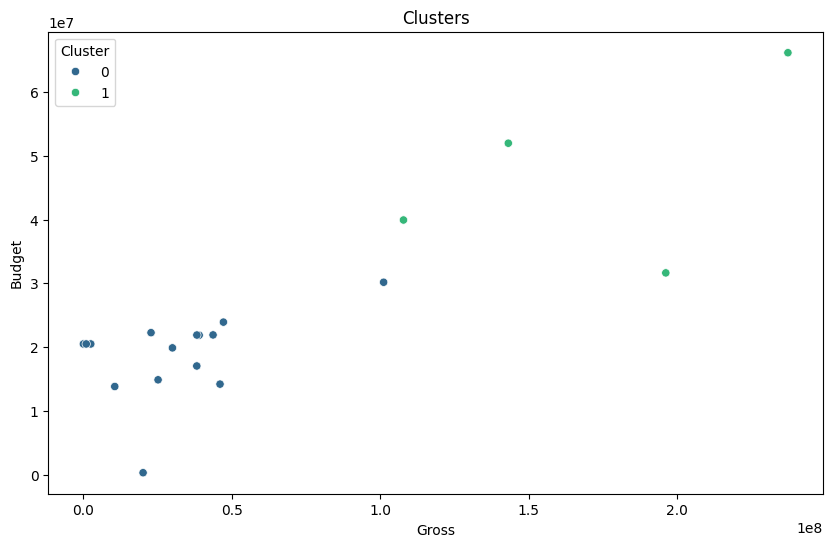

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dts['gross'], y=dts['budget'], hue=dts['cluster'], palette='viridis',data=dts)
plt.title('Clusters')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.legend(title='Cluster')
plt.show()